In [1]:
#A2w2a_HousingLoans_Data-Exploration-Visualization to make a classification model on Challenge 2

## Goal: Explore data w/ visualizations for Adventure Works dataset 
      #    for purpose of Classification Supervised ML w/ label= BikeBuyer

# Import Python pkgs pandas, numpy, matplotlib.pyplot, & seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
import math

%matplotlib inline  
# Start of magic command which configures execution environment, to display graphics w/in notebook

In [2]:
# Load already prepared dataset, display shape, & explore first 10 rows of Pandas data frame

LoanTest_C = pd.read_csv('progressData/LoanTest_Clean_2019-08-12y1.csv', header=0)
print(LoanTest_C.shape)
LoanTest_C.head(5)

(500000, 22)


,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,2,1,3,1,115.0,3,101,16,276,...,1,74.0,6329.0,59.536,69889.0,85.78,1874.0,2410.0,3791,True
1,1,1,1,1,1,252.0,2,87,20,68,...,1,107.0,2473.0,8.050,65313.0,100.00,947.0,1214.0,2839,True
2,2,1,1,1,1,270.0,1,-1,-1,-1,...,2,119.0,4975.0,22.955,67514.0,100.00,1326.0,1753.0,4701,False
3,3,2,1,1,1,179.0,2,376,20,11,...,2,44.0,4795.0,29.676,57766.0,100.00,1426.0,1765.0,2153,True
4,4,2,1,1,1,36.0,2,254,48,156,...,3,32.0,5246.0,5.110,63332.0,100.00,1452.0,2092.0,5710,False


In [3]:
# Compute & display frequency table for categorical variables w/pandas value_counts

def count_unique(LoanTest_C, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(LoanTest_C[col].value_counts())
        
cat_cols = ['msa_md', 'state_code','county_code', 'lender', 'loan_type',  'property_type', 'loan_purpose', 'occupancy',
            'preapproval', 'applicant_ethnicity', 'applicant_race', 'applicant_sex', 'co_applicant']
count_unique(LoanTest_C, cat_cols)


For column msa_md
-1      76993
 24     12968
 314    11196
 305    10460
 101    10319
 358     9609
 333     9524
 374     8795
 18      8521
 207     7228
 25      7157
 350     6128
 371     5720
 286     5481
 395     5238
 205     5063
 318     5054
 10      4645
 16      4625
 91      4593
 308     4590
 335     4587
 171     4545
 324     3866
 45      3832
 376     3761
 194     3715
 141     3612
 398     3588
 109     3498
        ...  
 366      127
 204      127
 164      126
 169      126
 140      124
 35       122
 103      121
 155      119
 360      118
 406      118
 212      117
 28       117
 196      115
 46       114
 261      113
 146      112
 320      110
 70       106
 394      106
 233      106
 201      101
 84        98
 195       95
 375       95
 361       90
 111       88
 334       83
 152       72
 304       54
 174       42
Name: msa_md, Length: 409, dtype: int64

For column state_code
 37    61515
 6     38124
 2     32024
-1     19120
 47    17598

In [4]:
#Calculate loan_amount to applicant_income ratio

LoanTest_C['LTI'] = (LoanTest_C['loan_amount']) / (LoanTest_C['applicant_income'])
LoanTest_C['LTI']

0           1.554054
1           2.355140
2           2.268908
3           4.068182
4           1.125000
5           1.083333
6           3.350000
7           5.714286
8           0.391586
9           2.958333
10          1.592593
11          1.733010
12          3.431034
13          2.155172
14          2.903448
15        109.500000
16          1.838710
17          3.972603
18          0.878378
19          1.833333
20          2.500000
21          0.082474
22          2.769231
23          3.736842
24          3.727273
25          2.782609
26          1.943548
27          1.424125
28          1.175676
29          0.130435
             ...    
499970      3.310811
499971      1.365385
499972      0.478571
499973      4.509202
499974      1.915789
499975      1.606635
499976      1.327586
499977      1.962687
499978      3.128713
499979      0.032258
499980      4.703704
499981      1.037037
499982      1.013699
499983      2.136095
499984      2.804348
499985      8.379310
499986      1

In [5]:
#Below- Aggregating Categorical Columns

def county_code_xform(x):
    if x > 260: return 5
    elif 195 < x <= 260: return 4
    elif 130 < x <= 195: return 3
    elif 65 <= x <= 130: return 2
    elif 0 <= x < 65: return 1
    

LoanTest_C["CountyGroup"] = LoanTest_C['county_code'].map(county_code_xform)
print(LoanTest_C["CountyGroup"])

0         5.0
1         2.0
2         NaN
3         1.0
4         3.0
5         3.0
6         NaN
7         2.0
8         4.0
9         1.0
10        1.0
11        5.0
12        3.0
13        2.0
14        1.0
15        5.0
16        4.0
17        2.0
18        1.0
19        5.0
20        NaN
21        5.0
22        1.0
23        4.0
24        1.0
25        2.0
26        2.0
27        5.0
28        4.0
29        5.0
         ... 
499970    3.0
499971    1.0
499972    3.0
499973    1.0
499974    4.0
499975    1.0
499976    4.0
499977    4.0
499978    2.0
499979    1.0
499980    NaN
499981    3.0
499982    1.0
499983    1.0
499984    1.0
499985    5.0
499986    4.0
499987    1.0
499988    1.0
499989    2.0
499990    3.0
499991    5.0
499992    5.0
499993    1.0
499994    1.0
499995    3.0
499996    4.0
499997    5.0
499998    4.0
499999    4.0
Name: CountyGroup, Length: 500000, dtype: float64


In [6]:
#Below- Aggregating Categorical Columns

def lender_xform(x):
    if x > 5208: return 5
    elif 3906 < x <= 5208: return 4
    elif 2604 < x <= 3906: return 3
    elif 1302 <= x <= 2604: return 2
    elif 0 <= x < 1302: return 1


LoanTest_C["LenderGroup"] = LoanTest_C['lender'].map(lender_xform)
print(LoanTest_C["LenderGroup"])

0         3
1         3
2         4
3         2
4         5
5         5
6         3
7         1
8         5
9         2
10        5
11        4
12        2
13        1
14        5
15        5
16        2
17        5
18        5
19        3
20        4
21        4
22        3
23        1
24        3
25        4
26        4
27        5
28        5
29        5
         ..
499970    4
499971    5
499972    3
499973    1
499974    3
499975    1
499976    3
499977    5
499978    5
499979    4
499980    4
499981    3
499982    5
499983    2
499984    4
499985    3
499986    3
499987    2
499988    4
499989    2
499990    2
499991    5
499992    4
499993    3
499994    3
499995    5
499996    5
499997    5
499998    5
499999    4
Name: LenderGroup, Length: 500000, dtype: int64


In [7]:
LoanTest_C['applicant_race'].value_counts()

5    361432
6     59957
3     40923
2     25538
7      5671
1      4212
4      2267
Name: applicant_race, dtype: int64

In [8]:
#Aggregate categories for applicant_race

race_cats = {5:5, 3:3, 2:2, 1:1, 4:1,
             6:6, 7:6}
LoanTest_C['RaceGroup'] = [race_cats[x] for x in LoanTest_C['applicant_race']]

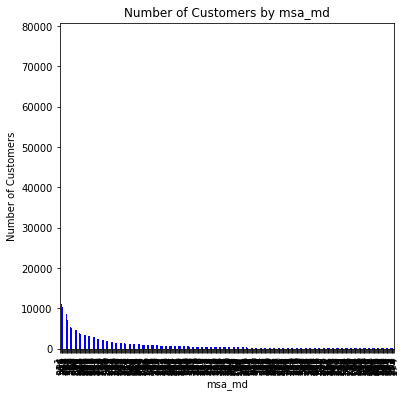

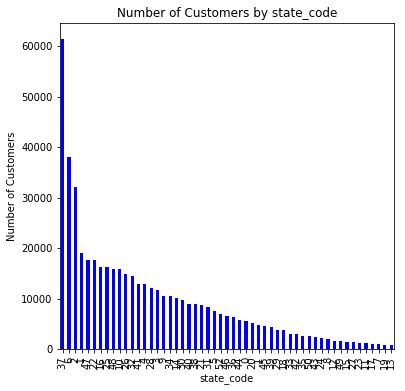

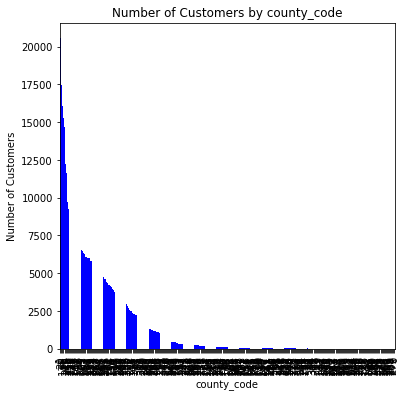

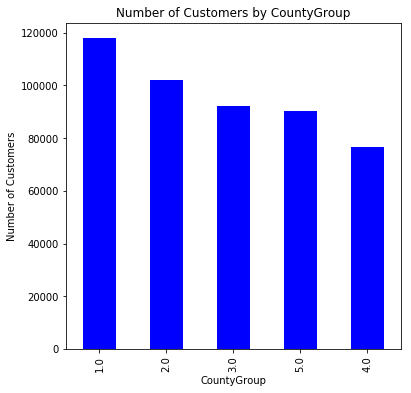

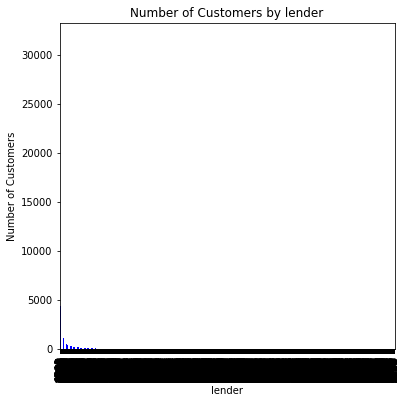

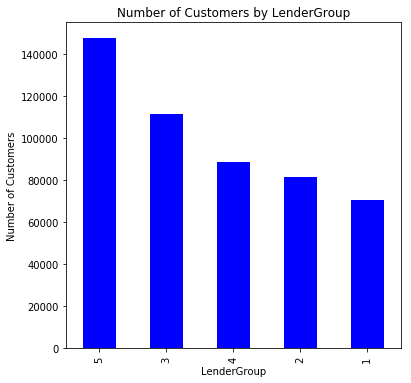

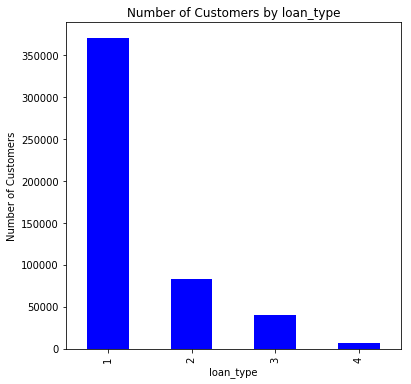

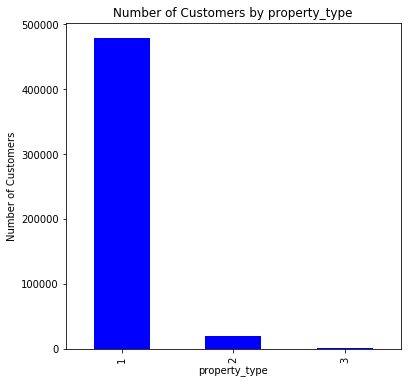

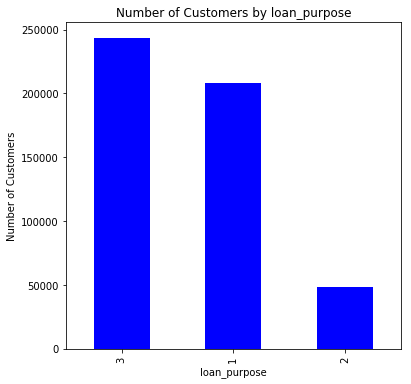

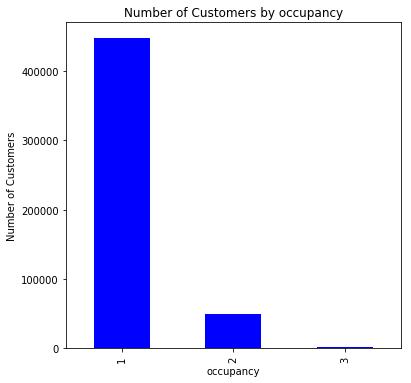

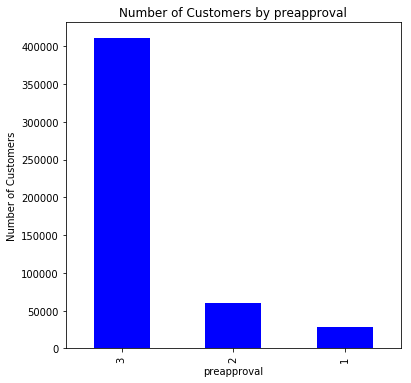

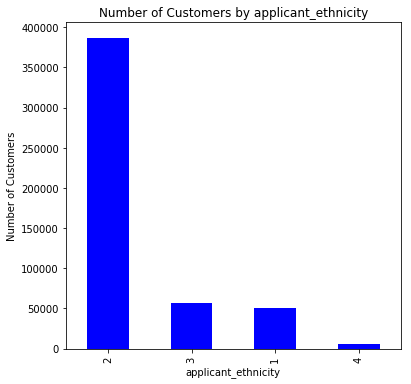

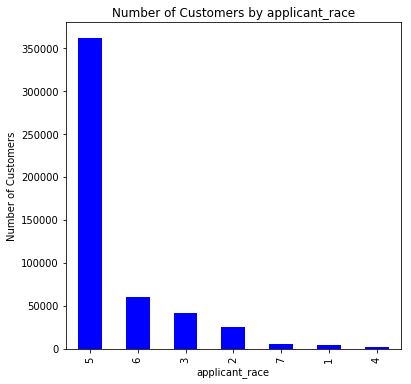

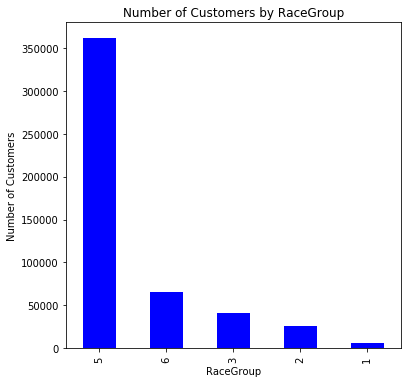

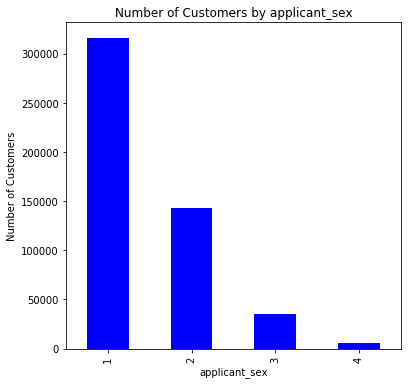

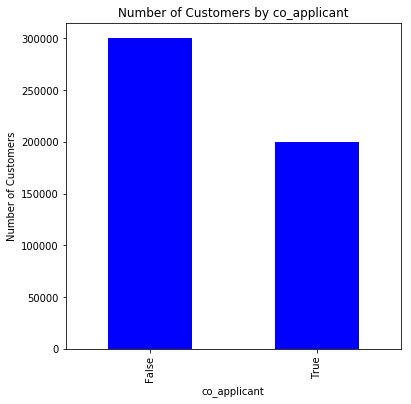

In [9]:
## Visualize distributions w/ 1 Dimensional Plots
# Step 1- Visualize frequency distributions of categorical variables w/ pandas Bar Chart plot.bar

def plot_bars(LoanTest_C, cols):
    for col in cols:        # Iterates over list of columns
        fig = plt.figure(figsize=(6,6))    # Figure plot & axes defined using matplotlib
        ax = fig.gca()
        counts = LoanTest_C[col].value_counts()    # Find counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue')    # Use plot.bar method from pandas on counts data frame
        ax.set_title('Number of Customers by ' + col)   # Give plot a main title w/ matplotlib
        ax.set_xlabel(col)    # Set x-axis labels w/ matplotlib
        ax.set_ylabel('Number of Customers')   # Set y-axis label w/ matplotlib
        plt.show()
        
plot_cols = ['msa_md', 'state_code','county_code', 'CountyGroup', 'lender', 'LenderGroup', 'loan_type',  'property_type', 'loan_purpose', 'occupancy',
            'preapproval', 'applicant_ethnicity', 'applicant_race', 'RaceGroup', 'applicant_sex', 'co_applicant']
plot_bars(LoanTest_C, plot_cols)

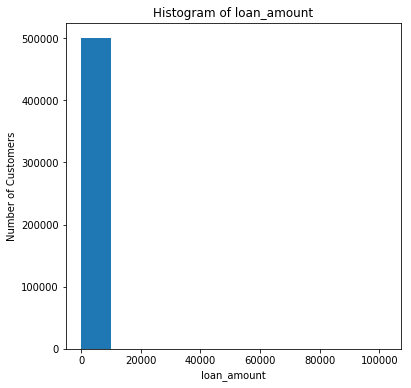

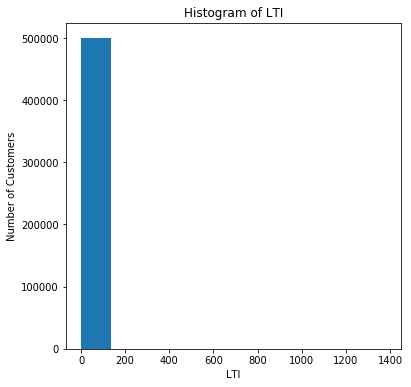

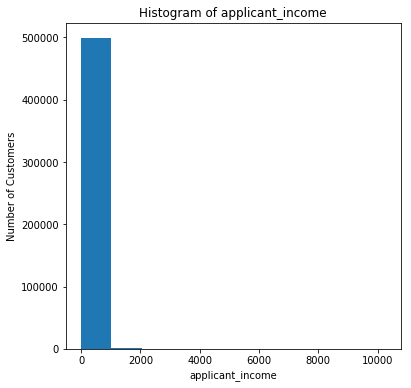

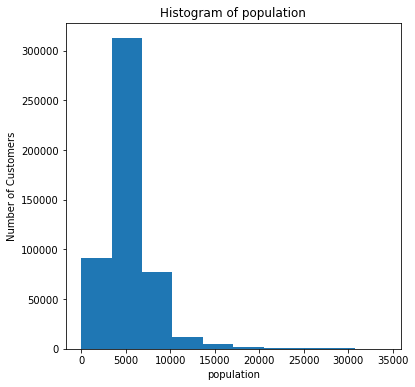

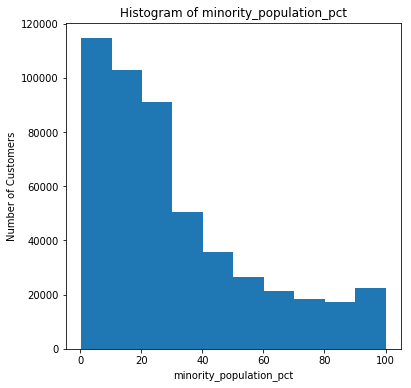

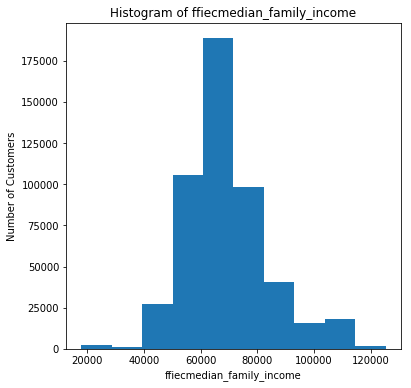

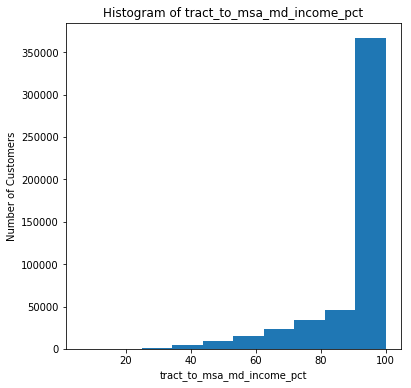

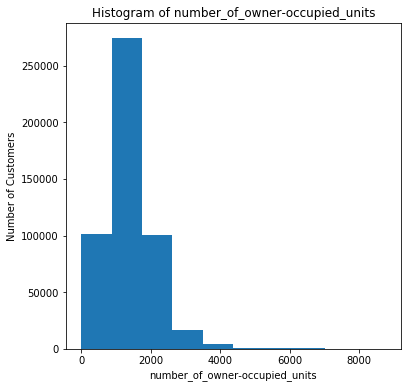

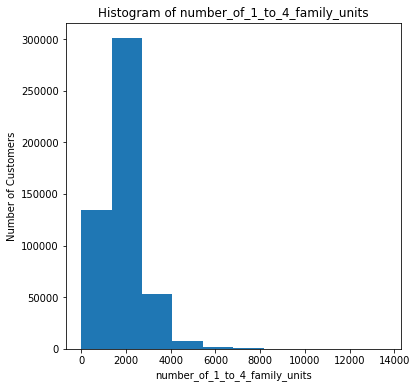

In [10]:
## Visualize Distributions w/ 1 Dimensional Plots
#Step 2- Visualize binned distributions of numerical feature variables w/ pandas histograms plot.hist

def plot_histogram(LoanTest_C, cols, bins = 10):
    for col in cols:        # Iterates over list of columns
        fig = plt.figure(figsize=(6,6))    # Figure plot & axes defined using matplotlib
        ax = fig.gca()
        LoanTest_C[col].plot.hist(ax = ax, bins = bins)    # Use plot.hist method from pandas on subset of data frame   
        ax.set_title('Histogram of ' + col)   # Give plot a main title w/ matplotlib
        ax.set_xlabel(col)    # Set x-axis labels w/ matplotlib
        ax.set_ylabel('Number of Customers')   # Set y-axis label w/ matplotlib
        plt.show()
        
num_cols = ['loan_amount', 'LTI', 'applicant_income', 'population', 'minority_population_pct', 'ffiecmedian_family_income',
            'tract_to_msa_md_income_pct', 'number_of_owner-occupied_units', 'number_of_1_to_4_family_units']

plot_histogram(LoanTest_C, num_cols) 

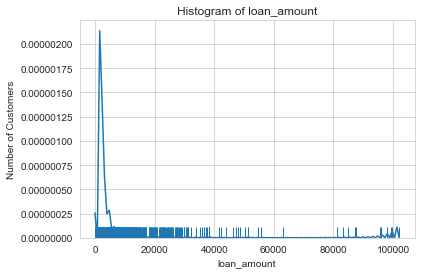

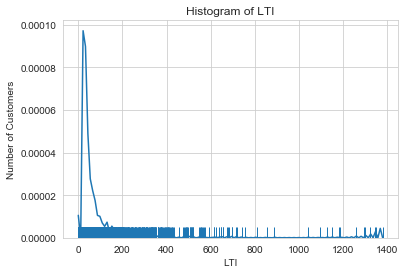

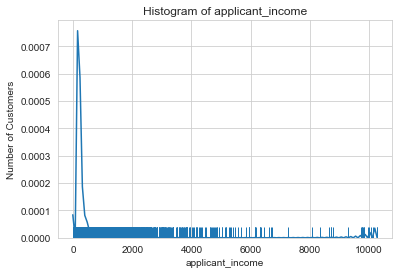

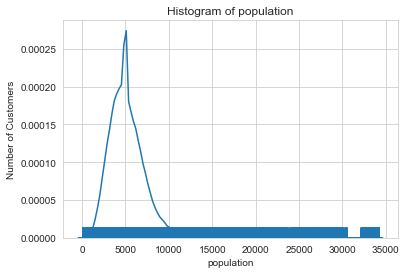

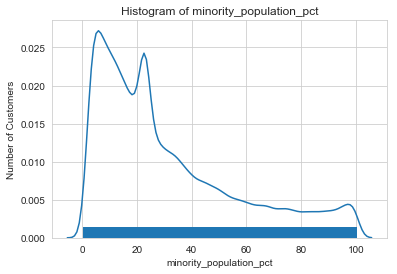

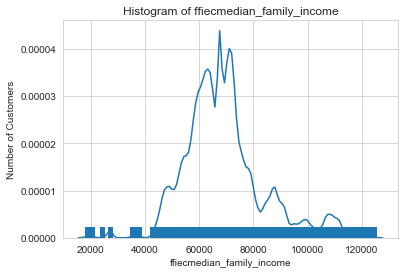

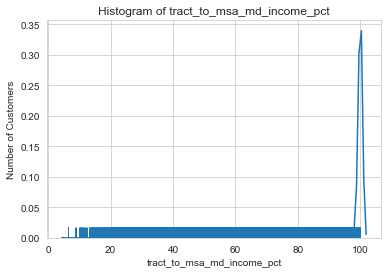

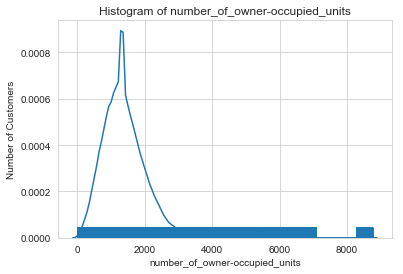

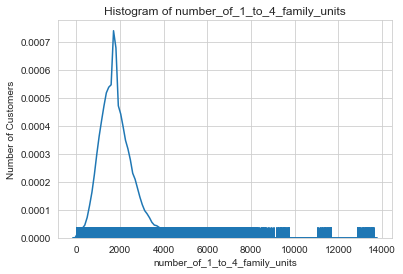

In [11]:
#Below- Kernel Density Estimation (KDE) plots provides a smooth denisty curve of data values w/ Seaborn distplot

def plot_density_hist(LoanTest_C, cols, bins = 10, hist = False):
    for col in cols:        # Iterates over list of columns
        sns.set_style("whitegrid")     # Set style for plot grid
        sns.distplot(LoanTest_C[col], bins = bins, rug = True, hist = hist)    # Use distplot type w/ rug along x-axis   
        plt.title('Histogram of ' + col)   # Give plot a main title w/ matplotlib
        plt.xlabel(col)    # Set x-axis labels w/ matplotlib
        plt.ylabel('Number of Customers')   # Set y-axis label w/ matplotlib
        plt.show()
        
#num_cols = ['loan_amount', 'applicant_income', 'population', 'minority_population_pct', 'ffiecmedian_family_income',
#            'tract_to_msa_md_income_pct', 'number_of_owner-occupied_units', 'number_of_1_to_4_family_units']
            
plot_density_hist(LoanTest_C, num_cols) 

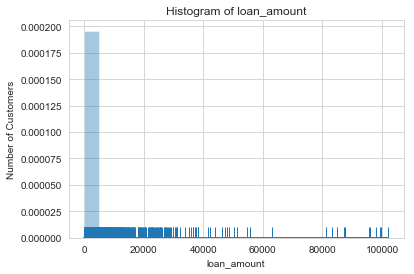

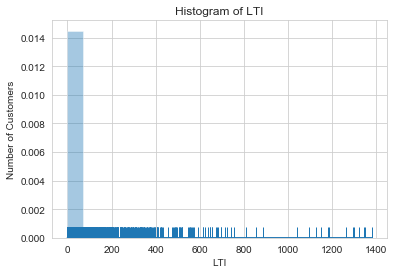

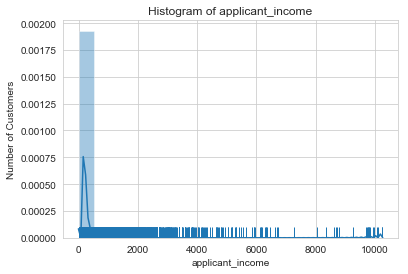

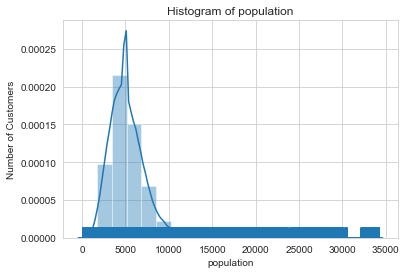

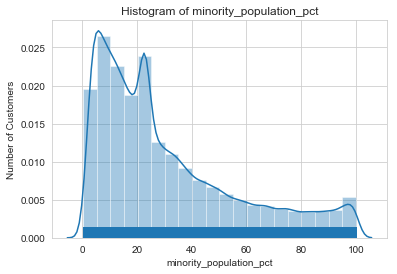

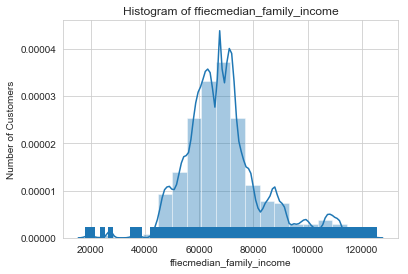

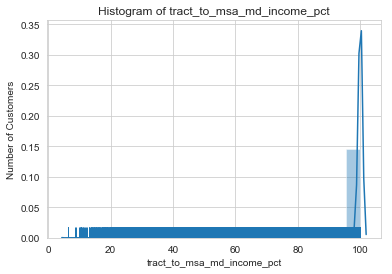

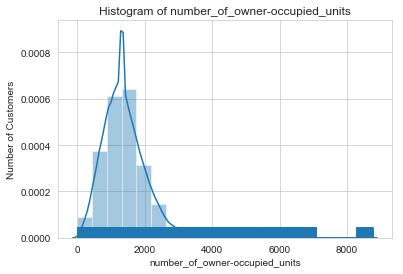

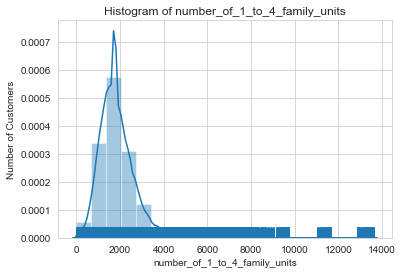

In [12]:
# Combine histogram & KDE plots w/ Seaborn

plot_density_hist(LoanTest_C, num_cols, bins = 20, hist = True)

In [13]:
#Above- Many of the distributions above look to be skewed which was also noticed in the differences between mean & median.

#Below- Measure the symmetry of a distribution, called skewness.
 # Skewness of a normal distribution is symmetrical and equal to 0.
 # Skewness greater than 0 has heavier tails toward the right than a normal distribution.
    # Skewness b/w 0 thru +0.5 = acceptable
    # Skewness b/w +0.5 thru +1.0 = problematic
    # Skewness +1.0 or more = extreme
 # Skewness less than 0 has heavier tails toward the left than a normal distribution.
    # Skewness b/w 0 thru -0.5 = acceptable
    # Skewness b/w -0.5 thru -1.0 = problematic
    # Skewness -1.0 or more = extreme

LoanTest_C.skew(axis=0)

row_id                            1.286588e-17
loan_type                         1.859245e+00
property_type                     5.200245e+00
loan_purpose                     -1.401447e-01
occupancy                         2.889053e+00
loan_amount                       8.060483e+01
preapproval                      -2.243414e+00
msa_md                            1.352286e-02
state_code                       -6.348564e-02
county_code                       2.300314e-01
applicant_ethnicity               5.854819e-01
applicant_race                   -1.578590e+00
applicant_sex                     1.372650e+00
applicant_income                  2.267564e+01
population                        2.968879e+00
minority_population_pct           1.071413e+00
ffiecmedian_family_income         8.027412e-01
tract_to_msa_md_income_pct       -2.030578e+00
number_of_owner-occupied_units    1.968372e+00
number_of_1_to_4_family_units     2.146467e+00
lender                           -2.186197e-01
co_applicant 

In [14]:
 #Above-  Skewness of a normal distribution is symmetrical and equal to 0.
 # Skewness greater than 0 has heavier tails toward the right than a normal distribution.
    # Skewness b/w 0 thru +0.5 = acceptable
    # Skewness b/w +0.5 thru +1.0 = problematic
    # Skewness +1.0 or more = extreme ---> majority of features
 # Skewness less than 0 has heavier tails toward the left than a normal distribution.
    # Skewness b/w 0 thru -0.5 = acceptable
    # Skewness b/w -0.5 thru -1.0 = problematic
    # Skewness -1.0 or more = extreme

    

#Below- Measure the combined sizes of the tails, called kurtosis. (Fisher's definition = 0)
 # Kurtosis of a normal distribution is equal to 0.
 # Kurtosis greater than 0 has heavier tails than a normal distribution.
 # Kurtosis less than 0 has lighter tails than a normal distribution.

LoanTest_C.kurtosis(axis=0)

row_id                              -1.200000
loan_type                            2.691171
property_type                       29.063709
loan_purpose                        -1.872562
occupancy                            7.658650
loan_amount                       9424.640202
preapproval                          3.920399
msa_md                              -1.488460
state_code                          -1.356953
county_code                         -1.238658
applicant_ethnicity                  2.726214
applicant_race                       2.649217
applicant_sex                        1.380587
applicant_income                  1076.591036
population                          18.338148
minority_population_pct              0.190244
ffiecmedian_family_income            1.289418
tract_to_msa_md_income_pct           3.727466
number_of_owner-occupied_units       9.821433
number_of_1_to_4_family_units       13.004005
lender                              -1.107871
co_applicant                      

In [15]:
#Above -  Kurtosis of a normal distribution is equal to 0.
 # Kurtosis greater than 0 has heavier tails and more 'pointy' than a normal distribution.
 # Kurtosis less than 0 has lighter tails and more 'flatter' than a normal distribution.

#Below - Due to skewness, transformations will be needed to be performed on data to approximate more of a normal distribution.
     # For skewness greater than +0.5 will use a natural log(X+C) where C=1
     # This log transformation can work for skewed data w/ values =0
        

LoanTest_C['log(x+1)_loan_amount'] = np.log(LoanTest_C['loan_amount']+1)
LoanTest_C['log(x+1)_LTI'] = np.log(LoanTest_C['LTI']+1)
LoanTest_C['log(x+1)_applicant_income'] = np.log(LoanTest_C['applicant_income']+1)
LoanTest_C['log(x+1)_population'] = np.log(LoanTest_C['population']+1)
LoanTest_C['log(x+1)_minority_population_pct'] = np.log(LoanTest_C['minority_population_pct']+1)
LoanTest_C['log(x+1)_ffiecmedian_family_income'] = np.log(LoanTest_C['ffiecmedian_family_income']+1)
LoanTest_C['log(x+1)_number_of_owner-occupied_units'] = np.log(LoanTest_C['number_of_owner-occupied_units']+1)
LoanTest_C['log(x+1)_number_of_1_to_4_family_units'] = np.log(LoanTest_C['number_of_1_to_4_family_units']+1)


     # For skewness less than -0.5 will use a power tranformation X^10

LoanTest_C['pwr10_tract_to_msa_md_income_pct'] = np.power(LoanTest_C['tract_to_msa_md_income_pct'],10)

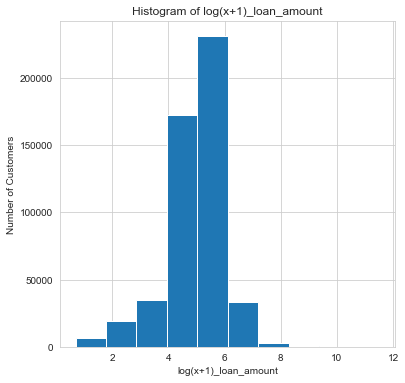

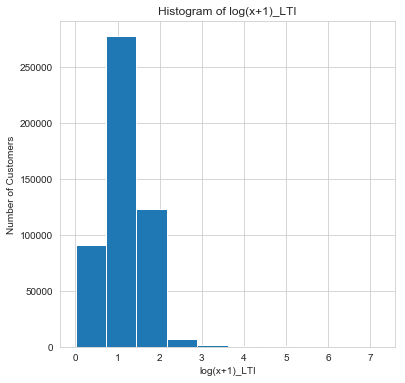

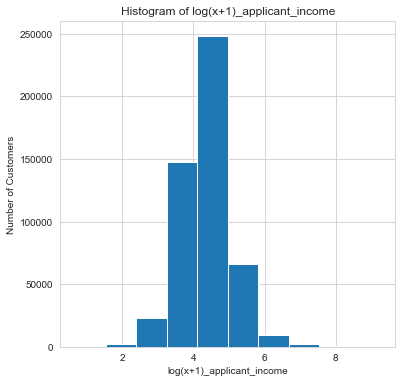

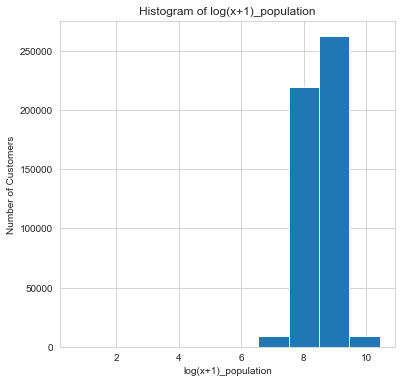

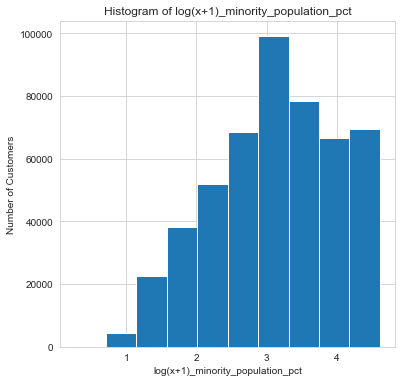

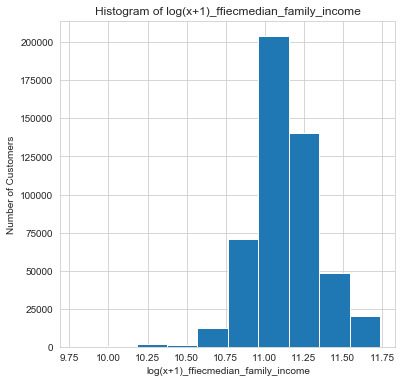

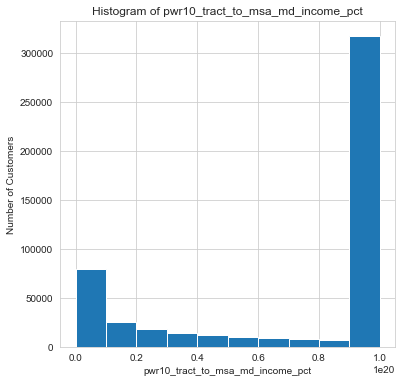

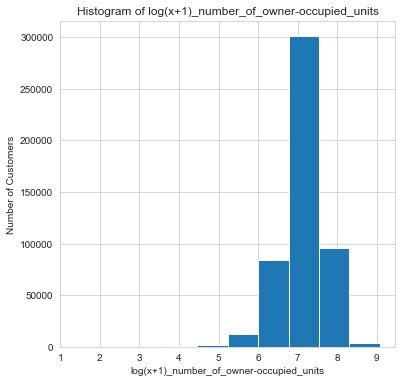

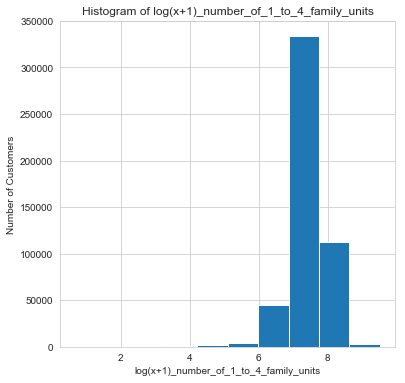

In [16]:
## Visualize Distributions w/ 1 Dimensional Plots
#Step 2- Visualize binned distributions of numerical feature variables w/ pandas histograms plot.hist

def plot_histogram(LoanTest_C, cols, bins = 10):
    for col in cols:        # Iterates over list of columns
        fig = plt.figure(figsize=(6,6))    # Figure plot & axes defined using matplotlib
        ax = fig.gca()
        LoanTest_C[col].plot.hist(ax = ax, bins = bins)    # Use plot.hist method from pandas on subset of data frame   
        ax.set_title('Histogram of ' + col)   # Give plot a main title w/ matplotlib
        ax.set_xlabel(col)    # Set x-axis labels w/ matplotlib
        ax.set_ylabel('Number of Customers')   # Set y-axis label w/ matplotlib
        plt.show()
        
num_cols_log = ['log(x+1)_loan_amount', 'log(x+1)_LTI', 'log(x+1)_applicant_income', 'log(x+1)_population', 'log(x+1)_minority_population_pct', 'log(x+1)_ffiecmedian_family_income',
            'pwr10_tract_to_msa_md_income_pct', 'log(x+1)_number_of_owner-occupied_units', 'log(x+1)_number_of_1_to_4_family_units']

plot_histogram(LoanTest_C, num_cols_log) 

In [ ]:
#Above- Shows potentially two multimodal distributions (air_particulate & adults w/ less than HS diploma) which may affect ML training model.
 # Many of the distributions above look to be skewed which was also noticed in the differences between mean & median.

#Below- Measure the symmetry of a distribution, called skewness.
 # Skewness of a normal distribution is symmetrical and equal to 0.
 # Skewness greater than 0 has heavier tails toward the right than a normal distribution.
    # Skewness b/w 0 thru +0.5 = acceptable
    # Skewness b/w +0.5 thru +1.0 = problematic
    # Skewness +1.0 or more = extreme
 # Skewness less than 0 has heavier tails toward the left than a normal distribution.
    # Skewness b/w 0 thru -0.5 = acceptable
    # Skewness b/w -0.5 thru -1.0 = problematic
    # Skewness -1.0 or more = extreme

LoanTest_C.skew(axis=0)

row_id                                     1.286588e-17
loan_type                                  1.859245e+00
property_type                              5.200245e+00
loan_purpose                              -1.401447e-01
occupancy                                  2.889053e+00
loan_amount                                8.060483e+01
preapproval                               -2.243414e+00
msa_md                                     1.352286e-02
state_code                                -6.348564e-02
county_code                                2.300314e-01
applicant_ethnicity                        5.854819e-01
applicant_race                            -1.578590e+00
applicant_sex                              1.372650e+00
applicant_income                           2.267564e+01
population                                 2.968879e+00
minority_population_pct                    1.071413e+00
ffiecmedian_family_income                  8.027412e-01
tract_to_msa_md_income_pct                -2.030

In [ ]:
#Below- Multi-axis plots
 # Pair-wise Scatter Plot using pairplot & map_upper in seaborn
    #ID Features
    
num_cols = ['loan_amount', 'applicant_income', 'population', 'minority_population_pct', 'ffiecmedian_family_income',
            'tract_to_msa_md_income_pct', 'number_of_owner-occupied_units', 'number_of_1_to_4_family_units']

sns.pairplot(LoanTest_C[num_cols],  palette = "Set2", diag_kind = "kde", height = 6)

In [ ]:
#Below- Multi-axis plots
 # Pair-wise Scatter Plot using pairplot & map_upper in seaborn
    #ID Features
    
num_cols = ['log(x+1)_loan_amount', 'log(x+1)_LTI', 'log(x+1)_applicant_income', 'log(x+1)_population', 'log(x+1)_minority_population_pct', 'log(x+1)_ffiecmedian_family_income',
            'pwr10_tract_to_msa_md_income_pct', 'log(x+1)_number_of_owner-occupied_units', 'log(x+1)_number_of_1_to_4_family_units']

sns.pairplot(LoanTest_C[num_cols],  palette = "Set2", diag_kind = "kde", height = 2)

In [ ]:
# Check if variables correlate using Pandas corr() method. 
  # Statistician Jacob Cohen suggested the following guidelines:
   #  Correlation    Meaning
   # 1. 0 - 0.1    Negligible
   # 2. 0.1 - 0.3    Small
   # 3. 0.3 - 0.5   Medium
   # 4.  0.50 +      Large
    
# Clustering
 # Previously saw that we had a cluster of several overlapping variables.
  # 1) Correlation matrix is computed using Pandas corr method.
  # 2) A hierarchical clustering model is constructed using methods from scipy.cluster.hierarchy package.
  #    A hierarchical cluster model is created by linking values based on a measure of distance into a hierarchy or tree using linkage function.
  # 3) Correlation matrix is permuted based on hierarchy & plotted as a heat map.

#import scipy.cluster.hierarchy as sch

# Compute the correlation matrix
corrs = LoanTest_C.corr(method='spearman')

# Create hierarchical clustering model
#dist = sch.distance.pdist(corrs)   # vector of pairwise distances using correlations
#linkage = sch.linkage(dist, method='complete') # Compute linkages for clusters
#ind = sch.fcluster(linkage, 0.5 * dist.max(), 'distance')  # Apply clustering algorithm

# Order columns of correlaton matrix according to hierarchy
#columns = [corrs.columns.tolist()[i] for i in list((np.argsort(ind)))]  # Order names for result
#corrs_clustered = corrs.reindex(columns)   # Reindex columns following heirarchy 

# Plot a heat map of clustered correlations
sns.heatmap(corrs)

In [ ]:
# Above - A prominent cluster of happiness, family, life expectancy, & GDP, which are all highly inter-correlated (bright spot on map).

# Display correlation matrix w/ numerical values using Pandas style.background_gradient()

corrs.style.background_gradient().set_precision(2)

In [ ]:
#Save this cleaned data to a csv

LoanTest_C.to_csv('progressData/LoanTest_Clean_2019-08-12-A2w2a.csv', index = False, header = True)